In [2]:
# Classic Imports
import pandas as pd
import re
import copy

In [3]:
# Getting the first Dataset
datasets = pd.read_csv('CSV\semi_clean_one.csv')

In [4]:
# Creating Minute by Minute Dataset
Inc = datasets['INC']

In [5]:
# Dropping all Nan Values to make it easier to Manage
Inc = Inc.dropna()

In [6]:
# Just Rechecking the data to make sure
Inc.info()

<class 'pandas.core.series.Series'>
Int64Index: 39165 entries, 28 to 52972
Series name: INC
Non-Null Count  Dtype 
--------------  ----- 
39165 non-null  object
dtypes: object(1)
memory usage: 612.0+ KB


In [7]:
# Creating a template to use for later use
massive = []

# Making a massive array wihtin array for all the minutes
for x in range(0, 90):
    # Re inputing all the arrays into the massive array
    place_holder = []
    place_holder.append(x + 1)
    massive.append(place_holder)

In [8]:
# Cleaning all the data to make sure its useable
minute_clean = []

# Reading to split all the data that has been prepared beforehand
for clean in range(len(Inc)):
    # Getting all the data that should be split
    saved = Inc._get_value(clean, 'INC')
    # Splitting all the data by . to get all the minute and action
    first_split = saved.split(".")
    # Second For loop to further split the data
    for second_clean in range(len(first_split)):
        # Another split to create action array by spliting with =
        second_split = first_split[second_clean].split('=')
        # Re appending everything back
        minute_clean.append(second_split)

# To Check
print(minute_clean)

# Copying the array to use later for redcard search
red_card_only = copy.deepcopy(minute_clean)

[[''], ['33', 'Goal_Home'], ['40', 'Yellow_Away'], ['56', 'Yellow_Away'], ['60', 'Yellow_Away'], ['60', 'Yellow_Home'], ['60', 'Yellow_Home'], ['69', 'Yellow_Home'], ['80', 'Yellow_Away'], ['88', 'Yellow_Home'], [''], ['59', 'Goal_Away'], ['69', 'Goal_Home'], ['73', 'Goal_Away'], ['75', 'Yellow_Home'], ['77', 'Yellow_Away'], ['83', 'Yellow_Home'], ['87', 'Goal_Home'], ['88', 'Yellow_Home'], [''], ['04', 'Goal_Away'], ['31', 'Yellow_Away'], ['42', 'Yellow_Home'], ['43', 'Goal_Away'], ['49', 'Goal_Home'], ['60', 'Goal_Home'], ['72', 'Goal_Away'], ['87', 'Yellow_Away'], ['90', 'Yellow_Away'], ['90', 'Yellow_Home'], [''], ['56', 'Yellow_Away'], ['57', 'Goal_Away'], ['65', 'Yellow_Away'], ['74', 'Goal_Home'], ['90', 'Yellow_Away'], [''], ['02', 'Goal_Home'], ['15', 'Yellow_Away'], ['22', 'Yellow_Away'], ['22', 'Yellow_Home'], ['80', 'Yellow_Home'], ['90', 'Yellow_Away'], ['90', 'Red_Card_Home'], [''], ['28', 'Goal_Away'], ['39', 'Goal_Home'], ['41', 'Goal_Away'], ['62', 'Goal_Home'], ['68',

In [9]:
# Counting all the empty arrays 
count = 0

# Check all the arrays
for varible_count in minute_clean:
    # Checking if the array has a length of less then zero
    if len(varible_count[0]) < 1:
        # Counting all the empty arrays
        count = count + 1

# Removing all the empty arrays based on amount of items counted
for x in range(0, count):
    # Removing empty array
    minute_clean.remove([''])

In [10]:
# Massive copy to reuse the template
yellow_home = copy.deepcopy(massive)
yellow_away = copy.deepcopy(massive)
goal_home = copy.deepcopy(massive)
goal_away = copy.deepcopy(massive)
red_card_home = copy.deepcopy(massive)
red_card_away = copy.deepcopy(massive)
own_home = copy.deepcopy(massive)
own_away = copy.deepcopy(massive)

# Generating all the values that need to be counted in the arrays
values = ['00', '01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12', '13', '14', '15', '16',
                      '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31',
                      '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46',
                      '47', '48', '49', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '60', '61',
                      '62', '63', '64', '65', '66', '67', '68', '69', '70', '71', '72', '73', '74', '75', '76',
                      '77', '78', '79', '80', '81', '82', '83', '84', '85', '86', '87', '88', '89', '90']

# Check if which action needs to put in which minute
for x in minute_clean:
    # Checking if the action is goal home and checking if the value exist
    if x[1] == 'Goal_Home' and x[0] in values:
        # Putting the action within goal home based on the minute
        goal_home[(int(x[0]) - 1)].append(x[1])
        
    # Checking if the action is goal away and checking if the value exist
    elif x[1] == 'Goal_Away' and x[0] in values:
        # Putting the action within goal away based on the minute
        goal_away[(int(x[0]) - 1)].append(x[1])

    # Checking if the action is yellow home and checking if the value exist
    elif x[1] == 'Yellow_Home' and x[0] in values:
        # Putting the action within yellow home based on the minute
        yellow_home[(int(x[0]) - 1)].append(x[1])

    # Checking if the action is yellow away and checking if the value exist
    elif x[1] == 'Yellow_Away' and x[0] in values:
        # Putting the action within yellow away based on the minute
        yellow_away[(int(x[0]) - 1)].append(x[1])

    # Checking if the action is red card home and checking if the value exist
    elif x[1] == 'Red_Card_Home' and x[0] in values:
        # Putting the action within red card home based on the minute
        red_card_home[(int(x[0]) - 1)].append(x[1])

    # Checking if the action is red card away and checking if the value exist
    elif x[1] == 'Red_Card_Away' and x[0] in values:
        # Putting the action within red card away based on the minute
        red_card_away[(int(x[0]) - 1)].append(x[1])

    # Checking if the action is own goal home and checking if the value exist
    elif x[1] == 'Own_Home' and x[0] in values:
        # Putting the action within own goal home based on the minute
        own_home[(int(x[0]) - 1)].append(x[1])

    # Checking if the action is the own goal away and checking if the value exist
    elif x[1] == 'Own_Away' and x[0] in values:
        # Putting the action within own goal away based on the minute
        own_away[(int(x[0]) - 1)].append(x[1])

# Defining method counting action to count all the actions
def counting_action(array_count):
    # Creating a for loop to count the length of the array
    for x in array_count:
        # Checking if the entered object is an array to reduce failure
        if type(x) == list:
            # Counting the length of the array
            saved = len(x)
            # For loop to remove all the items in the array
            for y in range(0, saved - 1):
                # Removing all the item in the array
                x.pop()
            # Appending the number of items removed based on the length
            x.append((saved - 1))

# Using the method to change all the data to be readable
counting_action(goal_home)
counting_action(goal_away)
counting_action(yellow_home)
counting_action(yellow_away)
counting_action(red_card_home)
counting_action(red_card_away)
counting_action(own_home)
counting_action(own_away)

In [11]:
# Making all of the data into dataframes to be manipulatable
g_h = pd.DataFrame(goal_home, columns=['Minute', 'Goal Home'])
g_a = pd.DataFrame(goal_away, columns=['Minute', 'Goal Away'])
y_h = pd.DataFrame(yellow_home, columns=['Minute', 'Yellow Home'])
y_a = pd.DataFrame(yellow_away, columns=['Minute', 'Yellow Away'])
r_c_h = pd.DataFrame(red_card_home, columns=['Minute', 'Red Card Home'])
r_c_a = pd.DataFrame(red_card_away, columns=['Minute', 'Red Card Away'])
o_h = pd.DataFrame(own_home, columns=['Minute', 'Own Goal Home'])
o_a = pd.DataFrame(own_away, columns=['Minute', 'Own Goal Away'])

In [12]:
# Creating a massive all minute dataframe to make it easier to manipulate
all = pd.merge(g_h, g_a, on='Minute')
all = pd.merge(all, y_h, on='Minute')
all = pd.merge(all, y_a, on='Minute')
all = pd.merge(all, r_c_h, on='Minute')
all = pd.merge(all, r_c_a, on='Minute')
all = pd.merge(all, o_h, on='Minute')
all = pd.merge(all, o_a, on='Minute')

In [13]:
all

Minute  Goal Home  Goal Away  Yellow Home  Yellow Away  Red Card Home  \
0        1        269        166           67           80              2   
1        2        396        330          127          135              5   
2        3        445        353          148          186              5   
3        4        478        343          168          209              2   
4        5        499        360          203          249              6   
..     ...        ...        ...          ...          ...            ...   
85      86        628        450          973         1042             79   
86      87        667        538         1028         1157             75   
87      88        669        487         1086         1191             78   
88      89        657        509         1149         1191            100   
89      90       1628       1248         2450         2770            297   

    Red Card Away  Own Goal Home  Own Goal Away  
0               2              4              3  
1               6             19             10  
2               8             14             10  
3              13             11             14  
4              13             17             15  
..            ...            ...            ...  
85            106             20             10  
86            103             14             17  
87            107             18             12  
88            106             15             15  
89            352             31             38  

[90 rows x 9 columns]

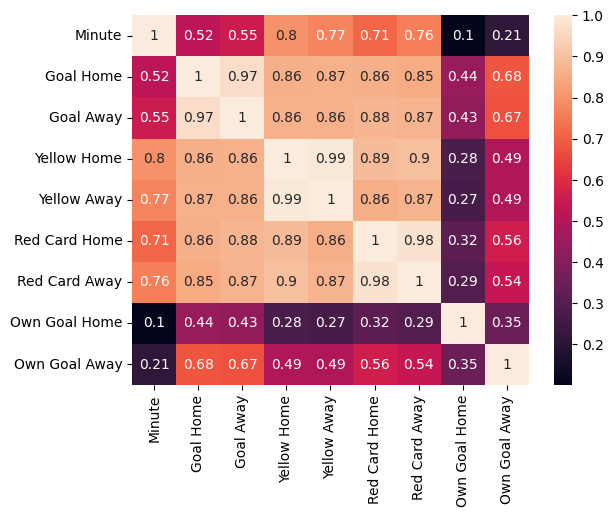

In [18]:
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt

corr_matrix = all.corr()

sn.heatmap(corr_matrix, annot=True)
plt.savefig('corrMatrix.png')